# Predicting the Most Valuable Home Improvement Projects In King County

## Introduction

The King County Housing Data Set contains information about the size, location, condition, and other features of houses in King County. A full description of the dataset's columns can be found below. The aim of this project is to develop a linear regression model than can predict which home improvement projects will add to the sale value of homes.

## Business Problem

A client in King County, WA wants to advise homeowners on home improvement projects that will add to the sale value of their homes.

## Analysis Questions

This analysis will seek to answer three questions about the data:

Question 1: Will enclosing a porch increase the sale price of a home?

Question 2: Is converting a garage to a bedroom a good way to increase the sale price of a home?

Question 3: Will upgrading to a forced-air heating system increase the sale price of a home?

## Previewing the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
housing_info = pd.read_csv('../../data/processed/housing_info.csv')
housing_info.head()

,Unnamed: 0,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,PropertyType,PrincipalUse,BldgNbr,...,HeatSystem,HeatSource,Bedrooms,YrBuilt,Condition,SqFtLot,View,TrafficNoise,OtherNuisances,Bathrooms
0,0,2743355,638580,110,07/14/2015,190000,20150715002686,3,6,1.0,...,5.0,2.0,4.0,1963.0,3.0,10534,0,0,N,2.0
1,1,2841697,894677,240,12/21/2016,818161,20161228000896,2,6,1.0,...,5.0,2.0,4.0,2016.0,3.0,3813,0,0,N,3.0
2,2,2860712,408330,4150,03/15/2017,1069300,20170426000922,3,6,1.0,...,5.0,2.0,5.0,1906.0,4.0,3420,0,0,N,3.0
3,3,2813396,510140,4256,07/25/2016,1069300,20160802000964,2,6,1.0,...,5.0,2.0,3.0,1949.0,3.0,3520,0,0,N,1.0
4,4,2899303,126320,110,10/30/2017,375000,,3,6,1.0,...,4.0,3.0,3.0,1919.0,3.0,4760,0,0,N,1.0


In [3]:
#Dropping the Unnamed: 0 column since no valuable data is provided
housing_info.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [4]:
housing_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246655 entries, 0 to 246654
Data columns (total 39 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ExciseTaxNbr        246655 non-null  int64  
 1   Major               246655 non-null  int64  
 2   Minor               246655 non-null  int64  
 3   DocumentDate        246655 non-null  object 
 4   SalePrice           246655 non-null  int64  
 5   RecordingNbr        246655 non-null  object 
 6   PropertyType        246655 non-null  int64  
 7   PrincipalUse        246655 non-null  int64  
 8   BldgNbr             246655 non-null  float64
 9   NbrLivingUnits      246655 non-null  float64
 10  Address             246655 non-null  object 
 11  BuildingNumber      246655 non-null  object 
 12  Stories             246655 non-null  float64
 13  BldgGrade           246655 non-null  float64
 14  SqFt1stFloor        246655 non-null  float64
 15  SqFt2ndFloor        246655 non-nul

In [5]:
housing_info.describe()

,ExciseTaxNbr,Major,Minor,SalePrice,PropertyType,PrincipalUse,BldgNbr,NbrLivingUnits,Stories,BldgGrade,...,SqFtDeck,HeatSystem,HeatSource,Bedrooms,YrBuilt,Condition,SqFtLot,View,TrafficNoise,Bathrooms
count,2.466550e+05,246655.000000,246655.000000,2.466550e+05,246655.000000,246655.000000,246655.000000,246655.0,246655.000000,246655.000000,...,246655.000000,246655.000000,246655.000000,246655.000000,246655.000000,246655.000000,2.466550e+05,246655.000000,246655.000000,246655.000000
mean,2.879853e+06,447797.033877,1599.483773,8.386916e+05,6.171170,6.001670,1.029320,1.0,1.521076,7.695928,...,136.399250,4.950088,2.094663,3.425258,1975.587326,3.441897,3.879752e+04,0.013557,0.222704,2.579457
std,9.809949e+04,287621.330384,2888.105119,7.126497e+05,6.210713,0.101385,0.434099,0.0,0.536648,1.214887,...,356.420356,1.065029,0.591210,0.968409,31.223755,0.692490,6.836423e+05,0.179584,0.579200,1.046756
min,2.708504e+06,100.000000,1.000000,-6.000000e+02,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1894.000000,1.000000,3.750000e+02,0.000000,0.000000,0.000000
25%,2.795070e+06,201500.000000,115.000000,4.700000e+05,3.000000,6.000000,1.000000,1.0,1.000000,7.000000,...,0.000000,5.000000,2.000000,3.000000,1954.000000,3.000000,5.100000e+03,0.000000,0.000000,2.000000
50%,2.879973e+06,382070.000000,330.000000,7.999500e+05,3.000000,6.000000,1.000000,1.0,1.500000,8.000000,...,0.000000,5.000000,2.000000,3.000000,1978.000000,3.000000,7.653000e+03,0.000000,0.000000,3.000000
75%,2.964752e+06,723040.000000,1050.000000,1.069300e+06,11.000000,6.000000,1.000000,1.0,2.000000,8.000000,...,210.000000,5.000000,2.000000,4.000000,2004.000000,4.000000,1.103200e+04,0.000000,0.000000,3.000000
max,3.050093e+06,990600.000000,9694.000000,6.250000e+07,99.000000,11.000000,21.000000,1.0,4.000000,20.000000,...,140000.000000,8.000000,7.000000,31.000000,2020.000000,5.000000,2.330525e+07,4.000000,3.000000,16.000000


These are large datasets, containing more than 245 thousand entries and 40 columns. Almost all of the columns contain numeric data, which is convenient for linear regression. A look at the distribution of variables in the dataset:

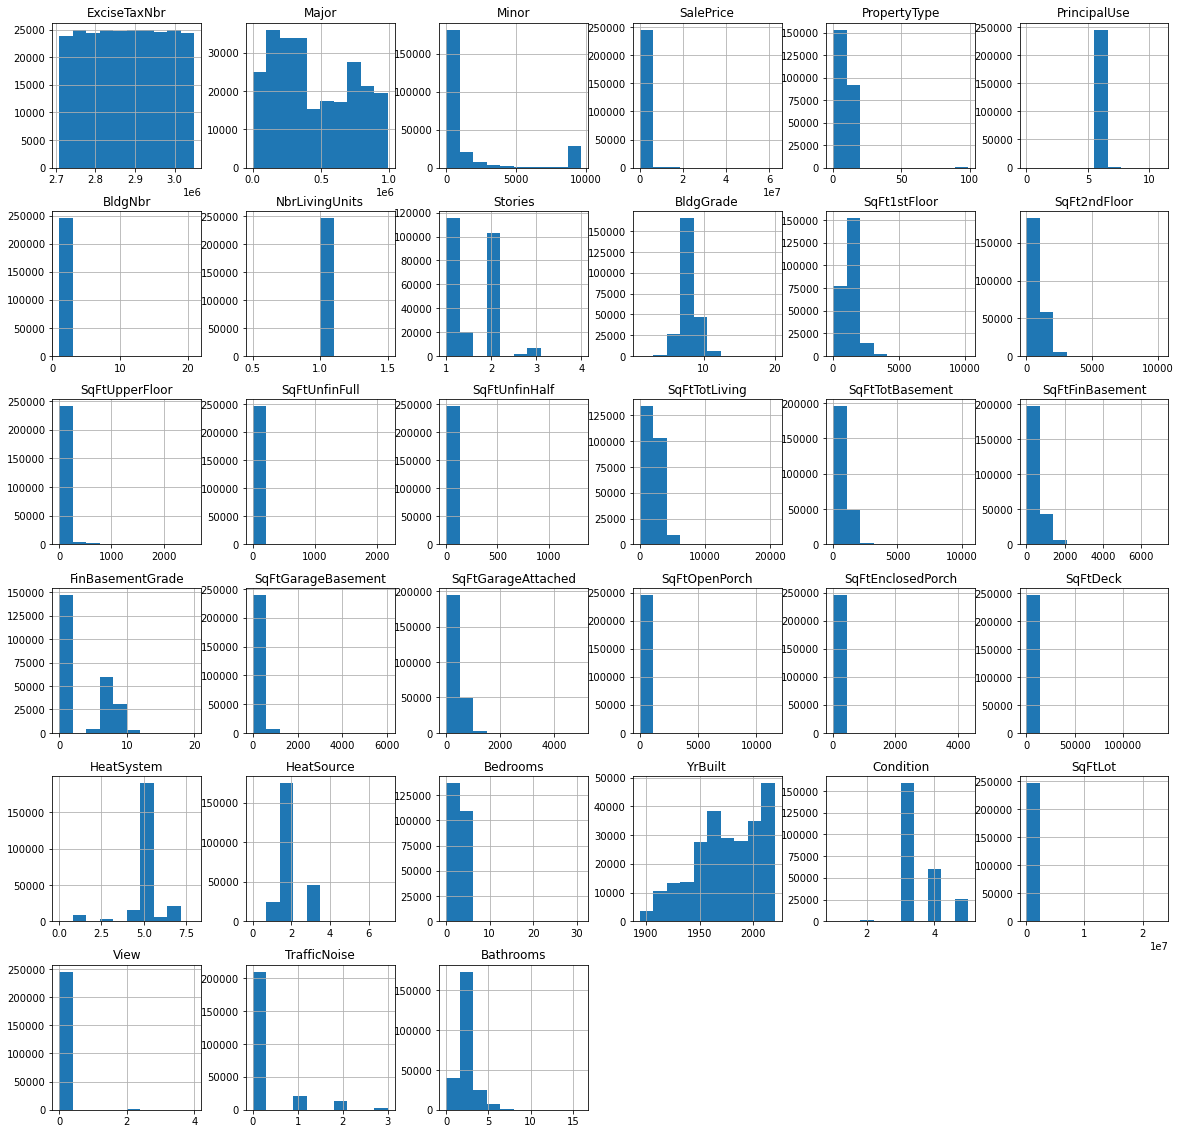

In [6]:
housing_info.hist(figsize=(20,20));

I will check for any missing values:

In [7]:
for column in list(housing_info.columns):
    print(column, sum(housing_info[column].isnull()))

ExciseTaxNbr 0
Major 0
Minor 0
DocumentDate 0
SalePrice 0
RecordingNbr 0
PropertyType 0
PrincipalUse 0
BldgNbr 0
NbrLivingUnits 0
Address 0
BuildingNumber 0
Stories 0
BldgGrade 0
SqFt1stFloor 0
SqFt2ndFloor 0
SqFtUpperFloor 0
SqFtUnfinFull 0
SqFtUnfinHalf 0
SqFtTotLiving 0
SqFtTotBasement 0
SqFtFinBasement 0
FinBasementGrade 0
SqFtGarageBasement 0
SqFtGarageAttached 0
DaylightBasement 0
SqFtOpenPorch 0
SqFtEnclosedPorch 0
SqFtDeck 0
HeatSystem 0
HeatSource 0
Bedrooms 0
YrBuilt 0
Condition 0
SqFtLot 0
View 0
TrafficNoise 0
OtherNuisances 0
Bathrooms 0


## Outliers

Outliers (rogue data or variables that differ greatly from the majority of the data points) should be retained if they have the potential to reveal useful information about relationships in our data. After careful consideration I've decided to remove the outliers of the 'Bedrooms' and 'Bathrooms' columns because if a home in the dataset has upwards of 5 bathrooms and more than 10 bedrooms for example, then it's most likely that they are larger units that would be beyond the scope of this particular analysis. For this reason, I'll remove the rows that contain outlier values for these two columns.

In [14]:
count = 0
bath_outliers = []
mean = np.mean(housing_info['Bathrooms'])
max_distance = np.std(housing_info['Bathrooms']) * 3 

for idx, row in housing_info['Bathrooms'].T.iteritems():
    if abs(row-mean) >= max_distance:
        count += 1
        housing_info.drop(idx, inplace=True)
count

2359

In [15]:
count = 0
bed_outliers = []
mean = np.mean(housing_info['Bedrooms'])
max_distance = np.std(housing_info['Bedrooms']) * 3 

for idx, row in housing_info['Bedrooms'].T.iteritems():
    if abs(row-mean) >= max_distance:
        count += 1
        housing_info.drop(idx,inplace=True)
count

1353

After dropping just under 2360 'Bathroom' outliers, 1353 'Bedroom' outliers remained: removing these outliers most likely also excluded removed extreme values for other variables.

## One-Hot Encoding

The main variable I would expect to be highly related with price, but does not have a clear linear relationship is 'Condition', whose values are on a scale of 1 to 5, with 1 being 'poor' and 5 being 'very good.' As seen in the scatterplot below, in terms of price 'average' houses tend to perform best.

In [17]:
plt.figure(figsize=(10,7))
sns.scatterplot(housing_info['Condition'], housing_info['SalePrice'])
plt.title('Condition and Price', fontsize=15)

KeyError: 'Condition'

<Figure size 720x504 with 0 Axes>

This could be owed to the fact that conditions are relative to age and grade ( an evaluation of the construction materials and level of craftsmanship used to build houses). An expensive, impeccably designed new construction could be given an 'average' rating if some functional adjustments are required. As we can see in the scatterplot below, average condition houses also tend to have the highest grade rating.

In [21]:
housing_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242943 entries, 0 to 246654
Data columns (total 46 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ExciseTaxNbr        242943 non-null  int64  
 1   Major               242943 non-null  int64  
 2   Minor               242943 non-null  int64  
 3   DocumentDate        242943 non-null  object 
 4   SalePrice           242943 non-null  int64  
 5   RecordingNbr        242943 non-null  object 
 6   PropertyType        242943 non-null  int64  
 7   PrincipalUse        242943 non-null  int64  
 8   BldgNbr             242943 non-null  float64
 9   NbrLivingUnits      242943 non-null  float64
 10  Address             242943 non-null  object 
 11  BuildingNumber      242943 non-null  object 
 12  Stories             242943 non-null  float64
 13  BldgGrade           242943 non-null  float64
 14  SqFt1stFloor        242943 non-null  float64
 15  SqFt2ndFloor        242943 non-nul

In [18]:
plt.figure(figsize=(10,7))
sns.scatterplot(housing_info['Condition'], housing_info['BldgGrade'])
plt.title('House Condition and Grade', fontsize=15)

KeyError: 'Condition'

<Figure size 720x504 with 0 Axes>

Since there may be a clearer linear relationship between specific condition values and prices, I will explore more thoroughly by one-hot encoding the variable.

In [10]:
one_hot = pd.get_dummies(housing_info['Condition'], drop_first=True) #drop a column to avoid dummy variable trap
housing_info = housing_info.drop('Condition',axis = 1) #drop the original column 
housing_info = housing_info.join(one_hot) #joins the new variables to the dataframe

Now I will take a look to see if we get a clearer picture of linear relationships by drawing up a scatterplot.

<Figure size 432x288 with 0 Axes>

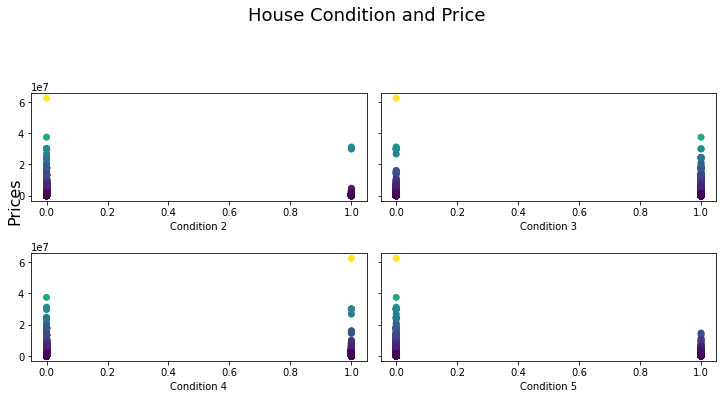

In [11]:
price = housing_info['SalePrice']
two = housing_info['two'] = housing_info[2] 
three = housing_info['three'] = housing_info[3] 
four = housing_info['four'] = housing_info[4] 
five = housing_info['five'] = housing_info[5] 

fig = plt.figure()
fig, axes = plt.subplots(nrows = 2, ncols = 2, sharex=False, sharey = True, figsize=(10,5))

fig.suptitle('House Condition and Price', fontsize=18, y=1.1)
fig.text(0.0001, 0.56, 'Prices', va='center', rotation='vertical', fontsize=16)

plot = axes[0][0].scatter(two, price, c = price, marker = "o")
axes[0][0].set_xlabel('Condition 2')

axes[0][1].scatter(three, price, c = price, marker = "o")
axes[0][1].set_xlabel('Condition 3')

axes[1][0].scatter(four, price, c = price, marker = "o")
axes[1][0].set_xlabel('Condition 4')

axes[1][1].scatter(five, price, c = price, marker = "o")
axes[1][1].set_xlabel('Condition 5')


fig.tight_layout()
plt.show()

There are linear relationships for each column as shown in the plot above.

To see which variables should be included in my model, I should investigate which variables are most strongly correlated with price. We want to make sure that there is no multicollinearity (meaning they can't be accurately predicted by other explanatory variables) among the explanatory variables. Below is a correlation matrix visualization of price and continuous variables in the dataset.

In [12]:
housing_info['SqFtLot'].head()

0    10534
1     3813
2     3420
3     3520
4     4760
Name: SqFtLot, dtype: int64

In [13]:
#create a list of meaningfully continuous x variables
x_columns = ['Bedrooms', 'Bathrooms', 'SqFtTotLiving','SqFt1stFloor','SqFt2ndFloor',
       'SqFtLot', 'SqFtUpperFloor','Stories', 'BldgGrade','View', 'YrBuilt', 2, 3, 4, 5]

#update dataframe to only include the above variables
df_clean = housing_info[x_columns]
df_clean['Price'] = housing_info['SalePrice']
housing_info = df_clean

KeyError: "['BathFullCount', 'BathHalfCount'] not in index"

In [ ]:
corr = housing_info.corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Variable Correlations', fontsize=15, y=.95)
heatmap = sns.heatmap(corr, cmap='Reds', annot=True)
heatmap

In [ ]:
housing_info['Bedrooms'].value_counts()

In [ ]:
housing_info.info()